# Setting up Environment

In [ ]:
!python --version  
# latest python version

Python 3.7.13


In [ ]:
# colab has required packages already ---> skipping
!pip install -q -U keras-tuner
# install keras which is a software library for artificial neural networks

# Importing Libraries

In [ ]:
!pip install pandas
# python software library for data manipulation and analysis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
# import tensorflow an open-source library for machine learning and artificial learning
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
# to plot graphs
import numpy as np
# import numpy for multidimensional arrays and matrices for huge mathematical computations
from sklearn.model_selection import train_test_split
# to split the training and testing data subsets
from tensorflow.keras.utils import to_categorical
# it converts a class matrix, vectors(integers) into binary class matrix
import keras_tuner as kt
# kerastuner is a libraray that helps to pick the optimal hyperparamerters for tensorflow
from tensorflow import keras
# imports keras: a python interface for artificial neural networks
from sklearn.model_selection import KFold
# imports kFold: Provides train/test indices to split data in train/test sets

In [ ]:
from sklearn.model_selection import KFold

# First View to the data

In [ ]:
# p_= os.path.abspath("mnist_data")
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data(path="mnist_data")

# Normalize pixel values to be between 0 and 1
# get number of original training and testing examples
train_images, test_images = train_images / 255.0, test_images / 255.0
print("Number of original training examples:", len(train_images))
print("Number of original test examples:", len(test_images))

Number of original training examples: 60000
Number of original test examples: 10000


# Sneek peek to data

(60000, 28, 28)
(60000,)


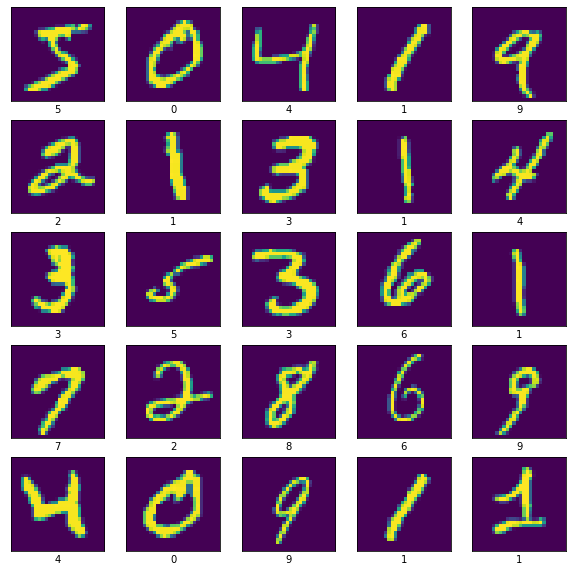

In [ ]:
print(train_images.shape)
print(train_labels.shape)
class_names = list(range(0,10))

# plot figure from the range of 0 to 10
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # show training images
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Pre-process the data

The current data can be pre-processed as follow-
 - Reshape the dataset to keep grayscale channel as independent axis ie. 28*28*1
 - Normalize the pixel value between 0 and 1 by divind the range of pixel value
 - Encode the output class into one-hot encoding for better convergence

In [ ]:
def prep_data():
  # prepare the data by processing the data
    (train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
    # normalize pixel value 
    train_images, test_images = train_images / 255.0, test_images / 255.0
    # reshape to bring 1D as separate dimension
    train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
    test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
    # onehot encode target class
    train_labels = to_categorical(train_labels)
    test_labels = to_categorical(test_labels)
    return train_images, train_labels, test_images, test_labels

# Splitting Data into Train-Val-Test

In [ ]:
train_images, train_labels, test_images, test_labels = prep_data()
# call the function

In [ ]:
print(train_images.shape)
print(test_labels.shape)
# print the number of training images and test labels

(60000, 28, 28, 1)
(10000, 10)


In [ ]:
def get_train_val(train_images, train_labels):
  # trained values function
    train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.20, random_state=42)
    return train_images, val_images, train_labels, val_labels

In [ ]:
train_images1, val_images, train_labels1, val_labels = get_train_val(train_images, train_labels)
# call the function

In [ ]:
print(train_images1.shape)
print(val_images.shape)
print(test_images.shape)
print(val_labels.shape)
# print the training images and test images with its values

(48000, 28, 28, 1)
(12000, 28, 28, 1)
(10000, 28, 28, 1)
(12000, 10)


# LeNet5 

In [ ]:
def leNet5():
  # leNet5() function:
  # LeNet5 is a CNN architecture used for detecting handwritten values based on Minist dataset
    model = models.Sequential()
    model.add(layers.Conv2D(6, kernel_size=5, strides=1, activation='tanh', padding='same', input_shape=(28, 28, 1)))
    model.add(layers.AveragePooling2D())
    model.add(layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'))
    model.add(layers.AveragePooling2D())
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='tanh'))
    model.add(layers.Dense(84, activation='tanh'))
    model.add(layers.Dense(10, activation='tanh'))
    print(model.summary())
    model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    return model

In [ ]:
leNet = leNet5()
# call the function

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [ ]:
le_history = leNet.fit(train_images1, train_labels1, epochs=10, validation_data=(val_images, val_labels), use_multiprocessing=True)
# train the training images 10 times which gives prediction
# epoch: one complete pass of training dataset through the algorithm

Epoch 1/10
1500/1500 [==============================] - 60s 39ms/step - loss: 0.9653 - accuracy: 0.9169 - val_loss: 0.8738 - val_accuracy: 0.9581
Epoch 2/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.8621 - accuracy: 0.9640 - val_loss: 0.8487 - val_accuracy: 0.9718
Epoch 3/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.8422 - accuracy: 0.9746 - val_loss: 0.8426 - val_accuracy: 0.9732
Epoch 4/10
1500/1500 [==============================] - 39s 26ms/step - loss: 0.8322 - accuracy: 0.9794 - val_loss: 0.8326 - val_accuracy: 0.9793
Epoch 5/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.8260 - accuracy: 0.9835 - val_loss: 0.8281 - val_accuracy: 0.9813
Epoch 6/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.8218 - accuracy: 0.9852 - val_loss: 0.8255 - val_accuracy: 0.9844
Epoch 7/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.8191 - accuracy: 0.9868 - val_loss: 0.8284 -

In [ ]:
leNet.save("leNet5.h5")
# save the result

# Evaluate - LeNet5 Model

In [ ]:
def eval_model(history):
  # evaluate model
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.8, 1])
    plt.legend(loc='lower right')



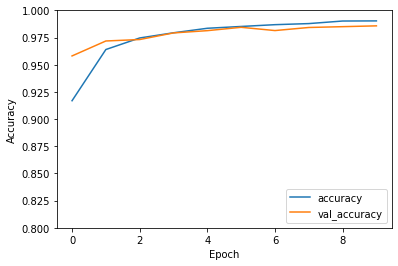

In [ ]:
eval_model(le_history)
# call the function

# Evaluate - LeNet5 Test Prediction

In [ ]:
test_loss, test_acc = leNet.evaluate(test_images,  test_labels, verbose=2)
# evaluate the loss and accuracy by evaluating the leNet

313/313 - 3s - loss: 0.8242 - accuracy: 0.9840 - 3s/epoch - 9ms/step


In [ ]:
test_pred = leNet.predict(test_images)
# predicted test data

In [ ]:
# Converting to integer label for confusion matrix calculation
pred_test_label = tf.argmax(test_pred, axis = 1)
# get the confusion matrix
true_test_label = tf.argmax(test_labels, axis = 1)

In [ ]:
confusion_mtx = tf.math.confusion_matrix(pred_test_label,
    true_test_label,
    num_classes=10)

In [ ]:
import seaborn as sns
# import seaborn to draw high level of attractive and statistical-informative graphics

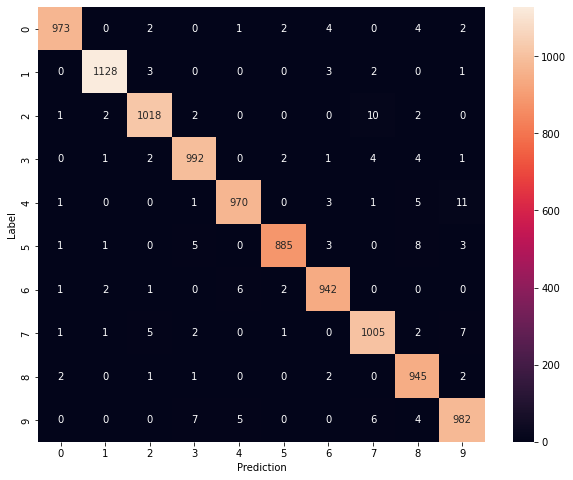

In [ ]:
def show_confusion_matrix(cm, labels):
  # show confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, xticklabels=labels, yticklabels=labels, 
              annot=True, fmt='g')
    plt.xlabel('Prediction')
    plt.ylabel('Label')
    plt.show()

show_confusion_matrix(confusion_mtx, list(range(0,10)))

# Create Beseline CNN Model

In [ ]:
def cnn_model_1():
  #  create a cnn model 1
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(layers.Dense(10))
    print(model.summary())
    model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    return model
  # tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),#auto encode to one hote from label 
  # Whether y_pred is expected to be a logits tensor. By default, we assume that y_pred encodes a probability distribution. #False, when proba dist-->sig function as activation


In [ ]:
model1 = cnn_model_1()
# Model1 variable for the CNN model 1

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 100)               540900    
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

# Train - Baseline CNN

In [ ]:
history1 = model1.fit(train_images1, train_labels1, epochs=10, validation_data=(val_images, val_labels), use_multiprocessing=True)
# train the model1

Epoch 1/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.1441 - accuracy: 0.9556 - val_loss: 0.0718 - val_accuracy: 0.9790
Epoch 2/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.0483 - accuracy: 0.9852 - val_loss: 0.0562 - val_accuracy: 0.9832
Epoch 3/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.0275 - accuracy: 0.9909 - val_loss: 0.0527 - val_accuracy: 0.9848
Epoch 4/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0174 - accuracy: 0.9948 - val_loss: 0.0683 - val_accuracy: 0.9822
Epoch 5/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.0131 - accuracy: 0.9955 - val_loss: 0.0599 - val_accuracy: 0.9827
Epoch 6/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.0085 - accuracy: 0.9973 - val_loss: 0.0536 - val_accuracy: 0.9882
Epoch 7/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0074 - accuracy: 0.9976 - val_loss: 0.0974 -

In [ ]:
model1.save("base_cnn.h5")
# save the data of model1

# Evaluate - Baseline CNN Model

In [ ]:
def eval_model(history):
  # evaluate model history
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.8, 1])
    plt.legend(loc='lower right')



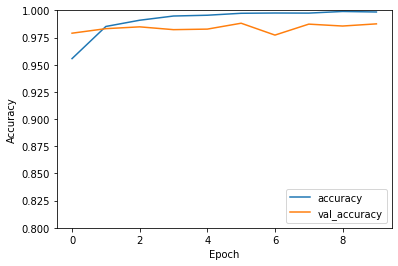

In [ ]:
eval_model(history1)
# call the function

# Evaluate - Baseline CNN Test Prediction

In [ ]:
test_loss, test_acc = model1.evaluate(test_images,  test_labels, verbose=2)
# loss and accuracy for model1

313/313 - 2s - loss: 0.0632 - accuracy: 0.9870 - 2s/epoch - 7ms/step


In [ ]:
test_pred = model1.predict(test_images)
# predicted test data

In [ ]:
# Converting to integer label for confusion matrix calculation
pred_test_label = tf.argmax(test_pred, axis = 1)
true_test_label = tf.argmax(test_labels, axis = 1)

In [ ]:
confusion_mtx = tf.math.confusion_matrix(pred_test_label,
    true_test_label,
    num_classes=10)

In [ ]:
import seaborn as sns
# import seaborn

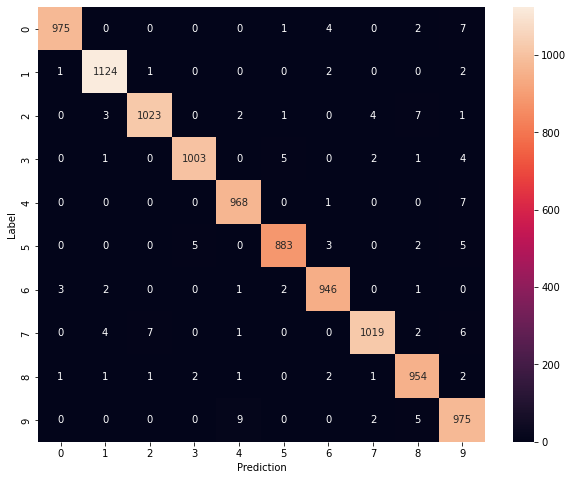

In [ ]:
def show_confusion_matrix(cm, labels):
  # show confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, xticklabels=labels, yticklabels=labels, 
              annot=True, fmt='g')
    plt.xlabel('Prediction')
    plt.ylabel('Label')
    plt.show()

show_confusion_matrix(confusion_mtx, list(range(0,10)))

# Create CNN Model - Increase Depth

In [ ]:
# We can increase the depth of the feature extractor part of the model, 
# following a VGG-like pattern of adding more convolutional and pooling layers 
# with the same sized filter, while increasing the number of filters
def cnn_model_2():
  # cnn model2
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(layers.Dense(10))
    print(model.summary())
    model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    # tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),#auto encode to one hote from label 
    # Whether y_pred is expected to be a logits tensor. By default, we assume that y_pred encodes a probability distribution. #False, when proba dist-->sig function as activation
    return model


In [ ]:
model2 = cnn_model_2()
# call the function

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1024)             

# Train - Increase Depth CNN Model

In [ ]:
# train the CNN model
history2 = model2.fit(train_images1, train_labels1, epochs=10, validation_data=(val_images, val_labels),use_multiprocessing=True)
# train the model2

Epoch 1/10
1500/1500 [==============================] - 103s 68ms/step - loss: 0.1239 - accuracy: 0.9613 - val_loss: 0.0709 - val_accuracy: 0.9772
Epoch 2/10
1500/1500 [==============================] - 79s 52ms/step - loss: 0.0451 - accuracy: 0.9853 - val_loss: 0.0433 - val_accuracy: 0.9864
Epoch 3/10
1500/1500 [==============================] - 102s 68ms/step - loss: 0.0305 - accuracy: 0.9906 - val_loss: 0.0389 - val_accuracy: 0.9891
Epoch 4/10
1500/1500 [==============================] - 106s 71ms/step - loss: 0.0215 - accuracy: 0.9933 - val_loss: 0.0426 - val_accuracy: 0.9887
Epoch 5/10
1500/1500 [==============================] - 134s 89ms/step - loss: 0.0176 - accuracy: 0.9943 - val_loss: 0.0391 - val_accuracy: 0.9904
Epoch 6/10
1500/1500 [==============================] - 108s 72ms/step - loss: 0.0137 - accuracy: 0.9950 - val_loss: 0.0510 - val_accuracy: 0.9871
Epoch 7/10
1500/1500 [==============================] - 83s 55ms/step - loss: 0.0113 - accuracy: 0.9965 - val_loss: 0.0

# Evaluate Model

In [ ]:
def eval_model(history):
  # evaluate model3
  # evaluate model
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.ylim([0.8, 1])
  plt.legend(loc='lower right')

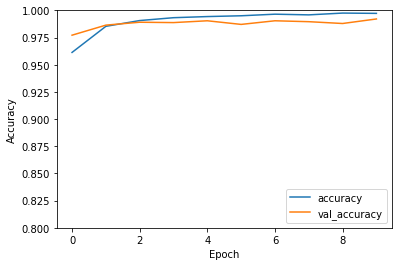

In [ ]:
eval_model(history2)
# call eval_model() function

# Evaluate Test Prediction

In [ ]:
test_loss, test_acc = model2.evaluate(test_images,  test_labels, verbose=2)
# get the test loss and test accuracy

313/313 - 4s - loss: 0.0324 - accuracy: 0.9917 - 4s/epoch - 13ms/step


In [ ]:
test_pred = model2.predict(test_images)
# get the prediction

In [ ]:
# Converting to integer label for confusion matrix calculation
pred_test_label = tf.argmax(test_pred, axis = 1)
true_test_label = tf.argmax(test_labels, axis = 1)

In [ ]:
# get the confusion matrix
confusion_mtx = tf.math.confusion_matrix(pred_test_label,
    true_test_label,
    num_classes=10)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(true_test_label, pred_test_label)

# get the precision, recall, score and support
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.99184506 0.99647577 0.99513145 0.9950446  0.99387755 0.98224195
 0.99161426 0.99224054 0.98874104 0.9880597 ]
recall: [0.99285714 0.99647577 0.99031008 0.99405941 0.99185336 0.99215247
 0.9874739  0.99513619 0.99178645 0.98414272]
fscore: [0.99235084 0.99647577 0.99271491 0.99455176 0.99286442 0.98717234
 0.98953975 0.99368626 0.9902614  0.98609732]
support: [ 980 1135 1032 1010  982  892  958 1028  974 1009]


In [ ]:
import pandas as pd
# import pandas
df_ = {"Class":list(range(0,10)), "Precision":precision, "Recall": recall, "Fscore":fscore}
# dataframe
df = pd.DataFrame(df_)
df.head(10)

,Class,Precision,Recall,Fscore
0,0,0.991845,0.992857,0.992351
1,1,0.996476,0.996476,0.996476
2,2,0.995131,0.990310,0.992715
3,3,0.995045,0.994059,0.994552
4,4,0.993878,0.991853,0.992864
5,5,0.982242,0.992152,0.987172
6,6,0.991614,0.987474,0.989540
7,7,0.992241,0.995136,0.993686
8,8,0.988741,0.991786,0.990261
9,9,0.988060,0.984143,0.986097


In [ ]:
import seaborn as sns
# import seaborn

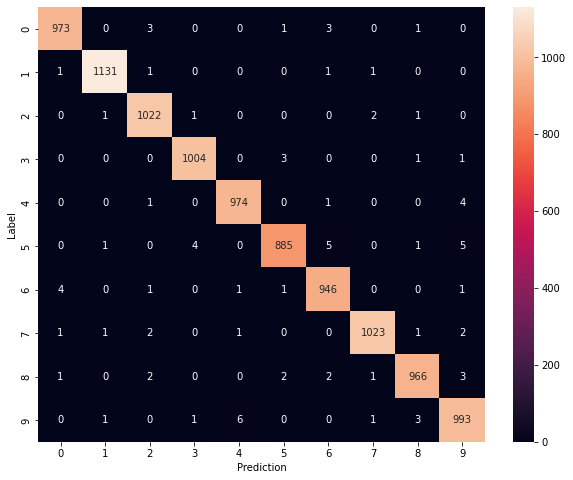

In [ ]:
def show_confusion_matrix(cm, labels):
  # show confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, xticklabels=labels, yticklabels=labels, 
              annot=True, fmt='g')
    plt.xlabel('Prediction')
    plt.ylabel('Label')
    plt.show()

show_confusion_matrix(confusion_mtx, list(range(0,10)))

# Hyper Param Tuning Best Model - Increased Depth CNN

In [ ]:
def model_builder(hp):
  # model builder
    # Tune the learning rate for the optimizer
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 32-512
    hp_units = hp.Choice('units',  values=[64, 100, 128, 256 ])
    model.add(layers.Dense(units=hp_units, activation='relu'))
    model.add(layers.Dense(10))
    print(model.summary())
    hp_optimizer = hp.Choice('optimizer', values=['adam', 'sgd'])
    model.compile(optimizer=hp_optimizer,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    return model

## Instantiate the tuner and perform hypertuning

Instantiate the tuner to perform the hypertuning. The Keras Tuner has four tuners available - `RandomSearch`, `Hyperband`, `BayesianOptimization`, and `Sklearn`. In this tutorial, you use the [Hyperband](https://arxiv.org/pdf/1603.06560.pdf) tuner.

To instantiate the Hyperband tuner, you must specify the hypermodel, the `objective` to optimize and the maximum number of epochs to train (`max_epochs`).

In [ ]:
# initialize the tuner
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=15,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_8 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1024)             

The Hyperband tuning algorithm uses adaptive resource allocation and early-stopping to quickly converge on a high-performing model. This is done using a sports championship style bracket. The algorithm trains a large number of models for a few epochs and carries forward only the top-performing half of models to the next round. Hyperband determines the number of models to train in a bracket by computing 1 + log<sub>`factor`</sub>(`max_epochs`) and rounding it up to the nearest integer.

Create a callback to stop training early after reaching a certain value for the validation loss.

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)
# stop the trainig if there is validation loss more

Run the hyperparameter search. The arguments for the search method are the same as those used for `tf.keras.model.fit` in addition to the callback above.

In [ ]:
tuner.search(train_images1, train_labels1, epochs=10, validation_data=(val_images, val_labels), callbacks=[stop_early])
# tuner search

In [ ]:
# Get the optimal hyperparameters
# get the parameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal optimizer
is {best_hps.get('optimizer')}.
""")


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 256 and the optimal optimizer
is adam.



## Fine Tune Learning Rate

In [ ]:
def model_builder2(hp):
  # model builder2 function
    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(layers.Dense(10))
    print(model.summary())
    model.compile(keras.optimizers.Adam(learning_rate=hp_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    return model

In [ ]:
#tuner for model builder2 
tuner = kt.Hyperband(model_builder2,
                     objective='val_accuracy',
                     max_epochs=15,
                     factor=3,
                     directory='my_dir2',
                     project_name='intro_to_kt2')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 9, 9, 64)          36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1024)             

The Hyperband tuning algorithm uses adaptive resource allocation and early-stopping to quickly converge on a high-performing model. This is done using a sports championship style bracket. The algorithm trains a large number of models for a few epochs and carries forward only the top-performing half of models to the next round. Hyperband determines the number of models to train in a bracket by computing 1 + log<sub>`factor`</sub>(`max_epochs`) and rounding it up to the nearest integer.

Create a callback to stop training early after reaching a certain value for the validation loss.

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)
# stop training if required

Run the hyperparameter search. The arguments for the search method are the same as those used for `tf.keras.model.fit` in addition to the callback above.

In [ ]:
tuner.search(train_images1, train_labels1, epochs=10, validation_data=(val_images, val_labels), callbacks=[stop_early])
# tuner search

In [ ]:
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal learning rate is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal learning rate is 0.001.



In [ ]:
modelF = tuner.hypermodel.build(best_hps)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 conv2d_14 (Conv2D)          (None, 9, 9, 64)          36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 1024)             

In [ ]:
modelF.save("bestModelF.h5")

# Train hyper-parameter tuned model via KFold

In [ ]:
def kfold_eval_model(data_img, data_label, n_folds=5):
  # train via kFold
    score_li, history_li = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_idx, test_idx in kfold.split(data_img):
        # define model
        model = cnn_model_2()
        # select rows for train and test
        trainX, trainY, testX, testY = data_img[train_idx], data_label[train_idx], data_img[test_idx], data_label[test_idx]
        # fit model
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), use_multiprocessing=True)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('&gt; %.3f' % (acc * 100.0))
        # stores scores
        score_li.append(acc)
        history_li.append(history)
    return score_li, history_li


In [ ]:
scores, histories = kfold_eval_model(train_images, train_labels)
# variables

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 conv2d_17 (Conv2D)          (None, 9, 9, 64)          36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 1024)             

In [ ]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
# import libs

def learning_plot(histories):
  # learning the plot values
    for i in range(len(histories)):
        # plot loss
        # pyplot.subplot(2, 1, 1)
        pyplot.title('K-Fold Loss')
        pyplot.xlabel('Epochs')
        pyplot.ylabel('Loss')
        pyplot.plot(histories[i].history['loss'], color='red', label='train')
        pyplot.plot(histories[i].history['val_loss'], color='green', label='test')
        pyplot.legend(["train", "test"], loc ="lower right")
        # plot accuracy
        # pyplot.subplot(2, 1, 2)
#         pyplot.title('K-Fold Classification Accuracy')
#         pyplot.xlabel('Epochs')
#         pyplot.ylabel('Accuracy')
        
#         pyplot.plot(histories[i].history['accuracy'], color='red', label='train')
#         pyplot.plot(histories[i].history['val_accuracy'], color='green', label='test')
#         pyplot.legend(["train", "test"], loc ="lower right")
    pyplot.show()


def kfold_performance(scores):
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # box and whisker plots of results
    pyplot.boxplot(scores)
    pyplot.show()


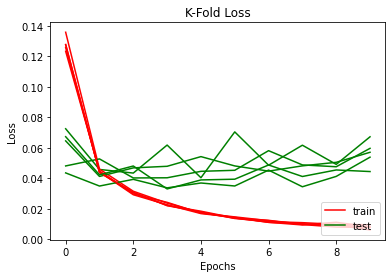

In [ ]:
# calling the function
learning_plot(histories)

Accuracy: mean=98.855 std=0.128, n=5


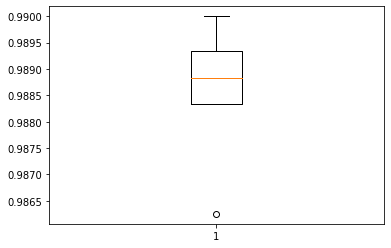

In [ ]:
kfold_performance(scores)
# calling function" kfold_performance()